In [2]:
import os
import sys
sys.path.append('..')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from medpy.io import load as load_lbl
import random 

from dicomhd import io as dhd_io
from tfvpc.utils import codes
from tfvpc.utils import dicom_spatial_metadata

from tfvpc.utils import io
%matplotlib inline

In [3]:
# load image and extract patches
cls_to_vis = 5
path_img = '../../data/dev/val/input/complete/'
path_lbl = '../../data/dev/val/output/complete/'

img_fname = 'Honeycomb-f7cd0c-Samir_reviewed_1-326'
lbl_fname = 'Honeycomb-f7cd0c-Samir_reviewed_1-365'

out_path ='../../data/dev/val/output/complete/Honeycomb-f7cd0c-Samir_reviewed_1-365/lbls.npy'

ct_series_file_path = os.path.join(path_img, img_fname)
ct_series = dhd_io.read_series(ct_series_file_path)
voxel_spacing = dicom_spatial_metadata.get_voxel_spacing(ct_series)
origin = dicom_spatial_metadata.get_origin(ct_series)
lbls = np.load(out_path)

In [4]:
debug_dir = '../../data/dev/val/output/complete/Honeycomb-f7cd0c-Samir_reviewed_1-365/'
voxel_spacing = dicom_spatial_metadata.get_voxel_spacing(ct_series)
origin = dicom_spatial_metadata.get_origin(ct_series)
output_nifti_file = os.path.join(debug_dir, "lbls_0.nii.gz")
io.np_export_nifti(
    output_nifti_file,
    lbls,
    spacing=voxel_spacing,
    origin=origin,
)

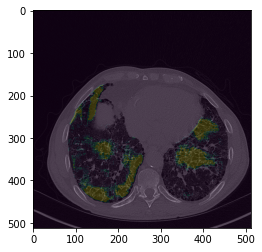

In [6]:
plt.imshow(ct_series.pixel_data[150,...], cmap = 'gray')
plt.imshow(lbls[150,...], alpha=0.2)

In [14]:
seg_fname = 'lbls_0.nii.gz'
seg_file_path = os.path.join(debug_dir, seg_fname)
# img = nib.load(seg_file_path)
seg, seg_header = load_lbl(seg_file_path)
seg = np.swapaxes(seg,0,2)


In [16]:
seg.shape

(423, 512, 512)

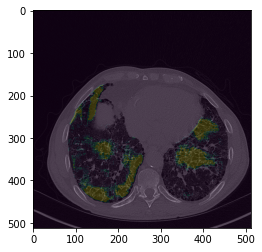

In [17]:
plt.imshow(ct_series.pixel_data[150,...], cmap = 'gray')
plt.imshow(seg[150,...], alpha=0.2)